In [1]:
%matplotlib inline

import os
import sys
import copy
import numpy as np

# filtering Astropy warnings
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter('ignore', category=AstropyWarning)

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

sys.path.append('../lib/')
from hdmclouds_v1 import *
from utils import *
from graph import *
from preprocessing import *
#from gmr_ import *
from gmr import *

from ipywidgets import interact, interactive, fixed, FloatSlider, IntSlider
import matplotlib
import matplotlib.pyplot as plt; plt.show()
matplotlib.rcParams.update({'font.size': 13})

#from pycupid import *
import astropy.units as u
from astropy.visualization import AsymmetricPercentileInterval


save_path = "/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/HDMC-v1/figures/"

***

In [2]:
fits_path = "../data/cubes/Orion.methanol.cbc.contsub.image.fits"
data,wcs,hdu,freq = load_data(fits_path)
#data,wcs,hdu = load_data(fits_path)

print(wcs)
print("\nShape of array:", data.shape)

/Users/martin/anaconda3/lib/python3.6/site-packages/spectral_cube/cube_utils.py:114: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  stokes_arrays[stokes_names[i_stokes]] = array[array_slice]


WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---SIN'  'DEC--SIN'  'FREQ'  
CRVAL : 83.80979166667  -5.376388888889  229763161321.4  
CRPIX : 51.0  51.0  1.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.0001111111111111  0.0001111111111111  -488336.1207886  
NAXIS : 100  100  41

Shape of array: (41, 100, 100)


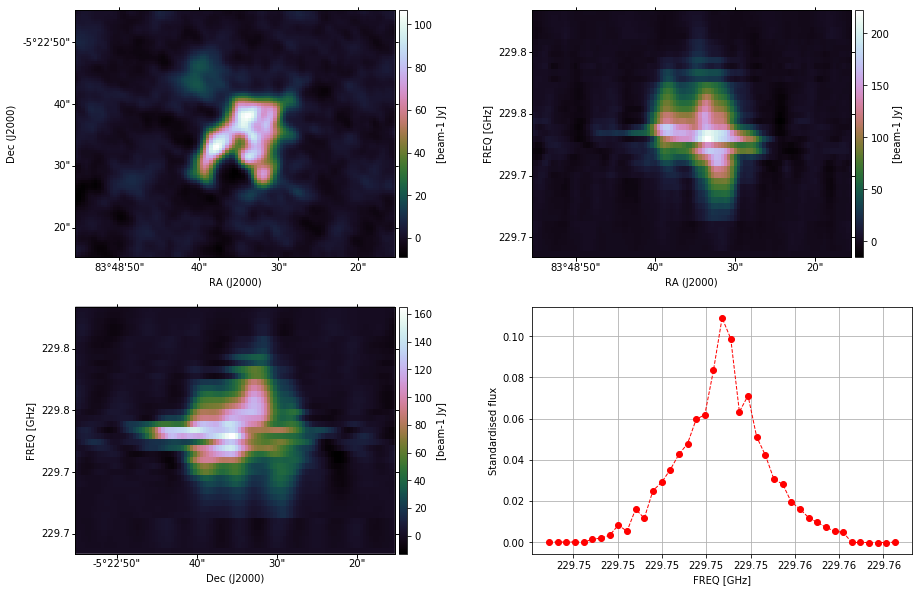

In [3]:
cube_plot(data, wcs=wcs, freq=freq, unit=hdu.header["BUNIT"])

In [4]:
%%prun -s tottime -q -l 30 -T gmr_v0_prof
rms = estimate_rms(data)
hdmc = HDMClouds(data, freq=freq, back_level=rms, wcs=wcs, verbose=False, compression=0.025)

[INFO] Number of pixels with significant emission: 17411

Isolated Cloud Entity A: 17411 pixels of significant emission.
 
*** Profile printout saved to text file 'gmr_v0_prof'. 


----------------------------------------------------------------------------------------------------------------------
ORIGINAL DATA


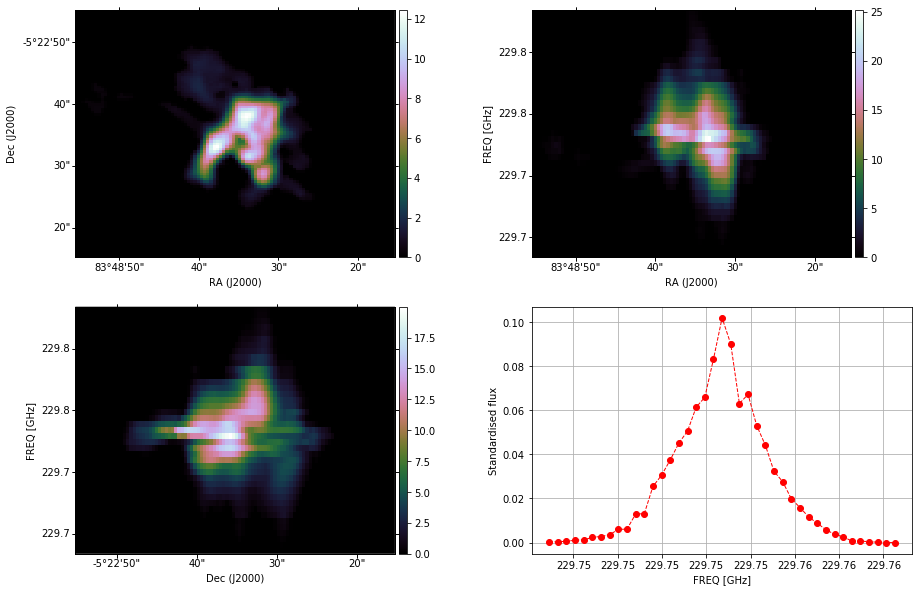

----------------------------------------------------------------------------------------------------------------------
GAUSSIAN MIXTURE


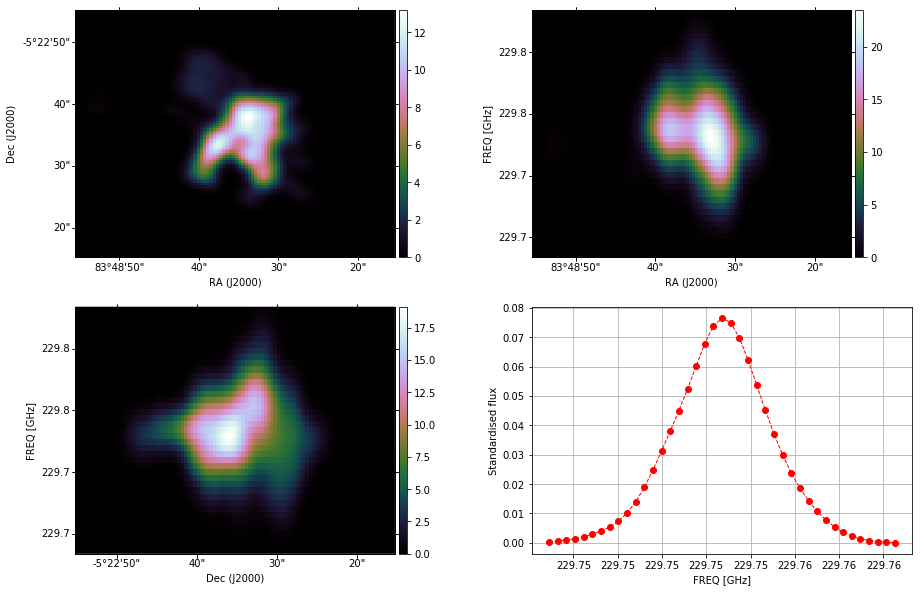

----------------------------------------------------------------------------------------------------------------------
RESIDUAL


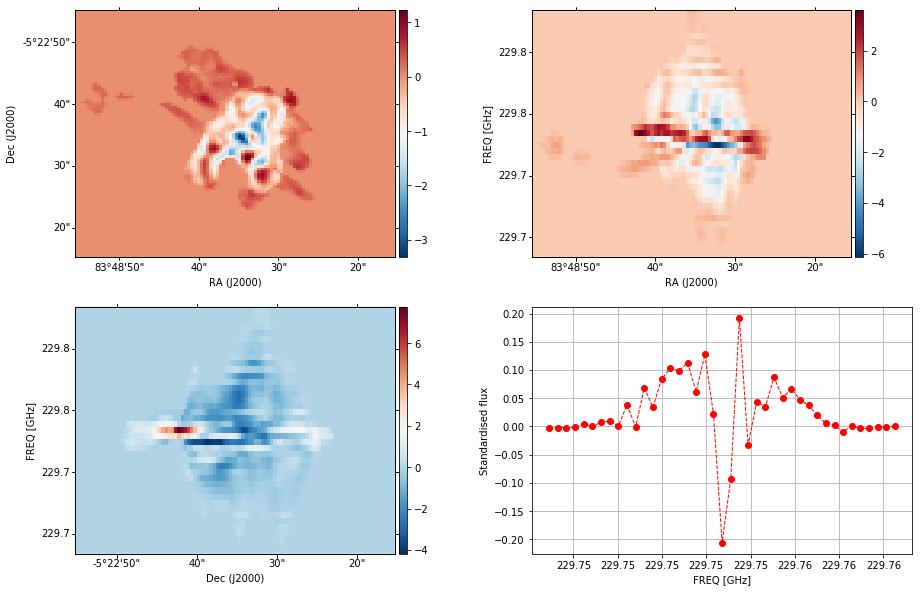

----------------------------------------------------------------------------------------------------------------------
RESIDUAL STATS
RMS of residual: 0.01895254072603881
Inf norm of residual: 0.4350294621520417
Variance of residual: 0.00035857514732415556
Normalized flux addition: 0.1387983983534982
Normalized flux lost: 0.08114938282597003


In [5]:
hdmc.get_residual_stats();

***

In [4]:
%%prun -s tottime -q -l 30 -T gmr_v0_prof
rms = estimate_rms(data)
hdmc = HDMClouds(data, freq=freq, back_level=rms, wcs=wcs, verbose=False, compression=0.025)

[INFO] Number of pixels with significant emission: 17411

Isolated Cloud Entity A: 17264 pixels of significant emission.
Isolated Cloud Entity B: 117 pixels of significant emission.
Isolated Cloud Entity C: 30 pixels of significant emission.
 
*** Profile printout saved to text file 'gmr_v0_prof'. 


----------------------------------------------------------------------------------------------------------------------
ORIGINAL DATA


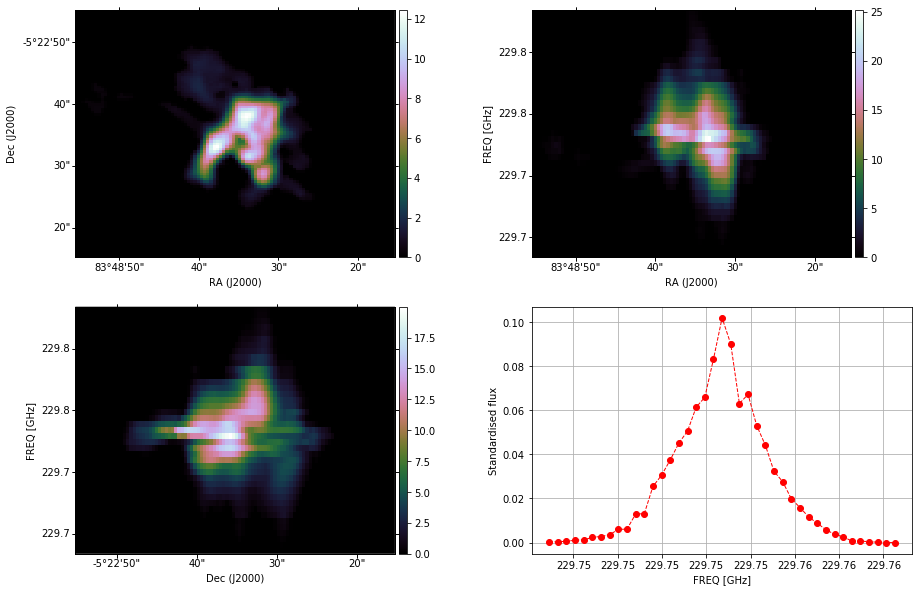

----------------------------------------------------------------------------------------------------------------------
GAUSSIAN MIXTURE


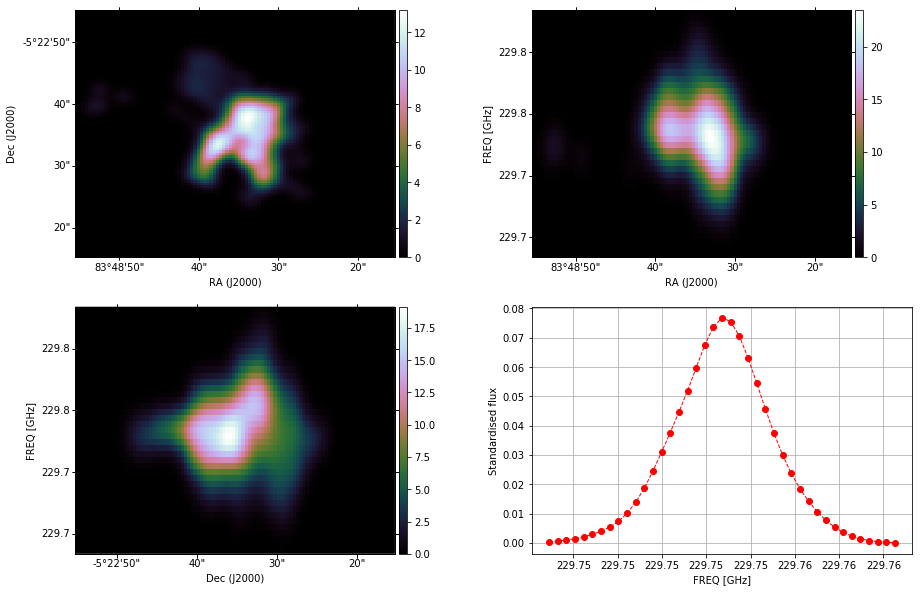

----------------------------------------------------------------------------------------------------------------------
RESIDUAL


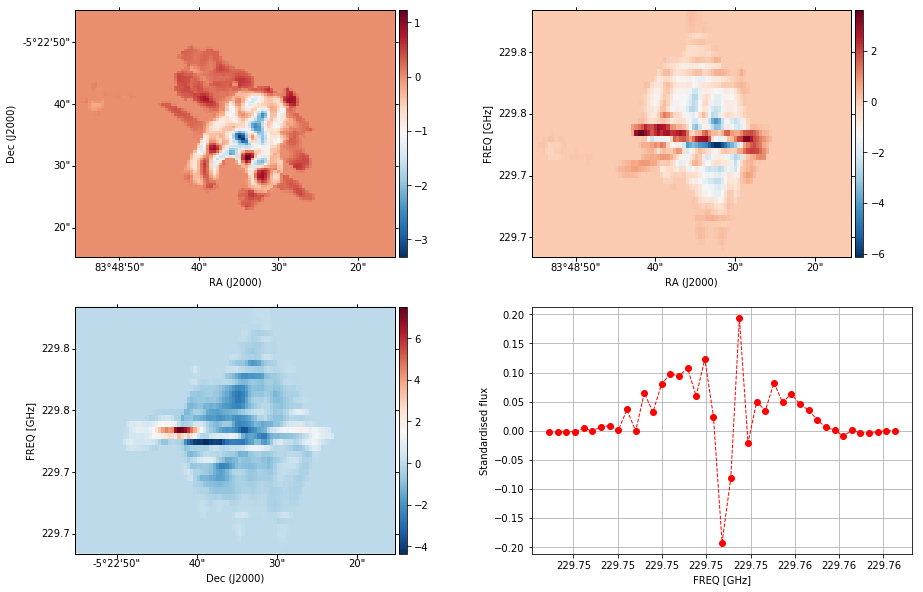

----------------------------------------------------------------------------------------------------------------------
RESIDUAL STATS
RMS of residual: 0.01889807017971269
Inf norm of residual: 0.43502529388761985
Variance of residual: 0.00035644980730010947
Normalized flux addition: 0.13947638101202095
Normalized flux lost: 0.07895934670990121


In [5]:
hdmc.get_residual_stats();

## Profiling Results

In [6]:
# with k_sig=2
print(open('gmr_v0_prof', 'r').read())

         150055161 function calls (150019142 primitive calls) in 115.565 seconds

   Ordered by: internal time
   List reduced from 1619 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    16975   20.986    0.001   20.986    0.001 gmr.py:268(update_structs)
       10   20.683    2.068   68.821    6.882 utils.py:185(compute_neighbors)
  1658285   15.866    0.000   15.866    0.000 {method 'sort' of 'list' objects}
   273794   11.968    0.000   11.968    0.000 {built-in method numpy.core.multiarray.array}
141157141   10.094    0.000   10.094    0.000 {method 'append' of 'list' objects}
    16991    8.377    0.000    9.338    0.001 {method 'query_radius' of 'sklearn.neighbors.ball_tree.BinaryTree' objects}
    16975    7.195    0.000    7.195    0.000 gmr.py:213(least_dissimilar)
  1658283    4.661    0.000    4.661    0.000 {method 'tolist' of 'numpy.ndarray' objects}
        6    1.743    0.290   43.951    7.325 gmr.py:366(mixture_re

## GM parameters optimization

In [6]:
%%prun -s tottime -q -l 30 -T gma_prof
hdmc.build_gmr()

---------------------------------------------
Building GM for Isolated Cloud Entity A
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.09085273325001973
Inf norm of residual: 0.5411432796169763
Variance of residual: 0.007416414333692034
Normalized flux addition: 0.15002725217495078
Normalized flux lost: 0.06029846399603118


 
*** Profile printout saved to text file 'gma_prof'. 


In [7]:
%%prun -s tottime -q -l 30 -T gma_prof
hdmc.build_gmr()

---------------------------------------------
Building GM for Isolated Cloud Entity A
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.09240656982292815
Inf norm of residual: 0.7969914214030935
Variance of residual: 0.007566305255646179
Normalized flux addition: 0.15393203227811977
Normalized flux lost: 0.057787653155789306


---------------------------------------------
Building GM for Isolated Cloud Entity B
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.015633067012257605
Inf norm of residual: 0.038828075421462716
Variance of residual: 0.00020527717756582442
Normalized flux addition: 0.08379912407881757
Normalized flux lost: 0.027849428446017975


---------------------------------------------
Building GM for Isolated Cloud Entity C
---------------------------------------------
RESIDUAL STATS
RMS of residual: 0.01562785741776741
Inf norm of residual: 0.029223818682746608
Variance of residual: 0.00010091487356468049
Norma

----------------------------------------------------------------------------------------------------------------------
ORIGINAL DATA


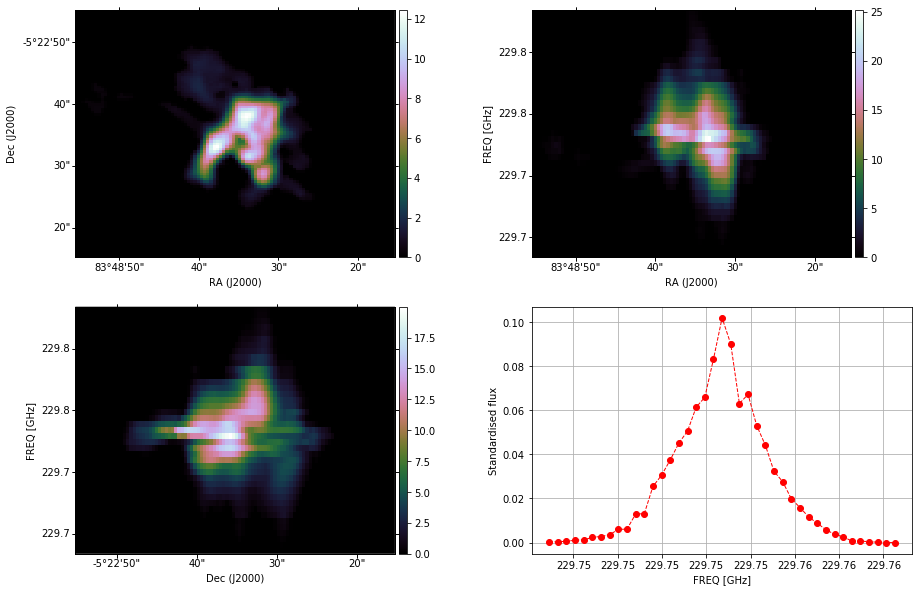

----------------------------------------------------------------------------------------------------------------------
GAUSSIAN MIXTURE


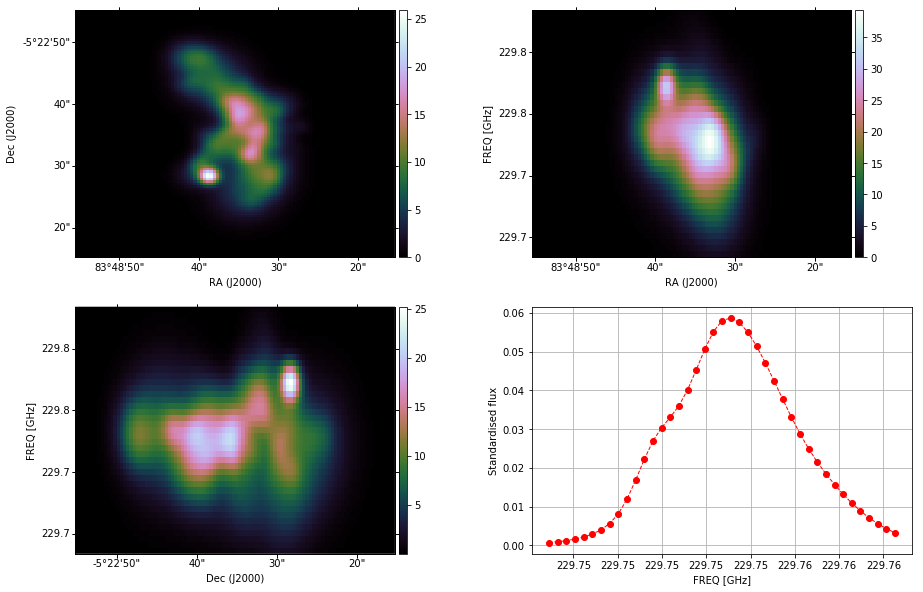

----------------------------------------------------------------------------------------------------------------------
RESIDUAL


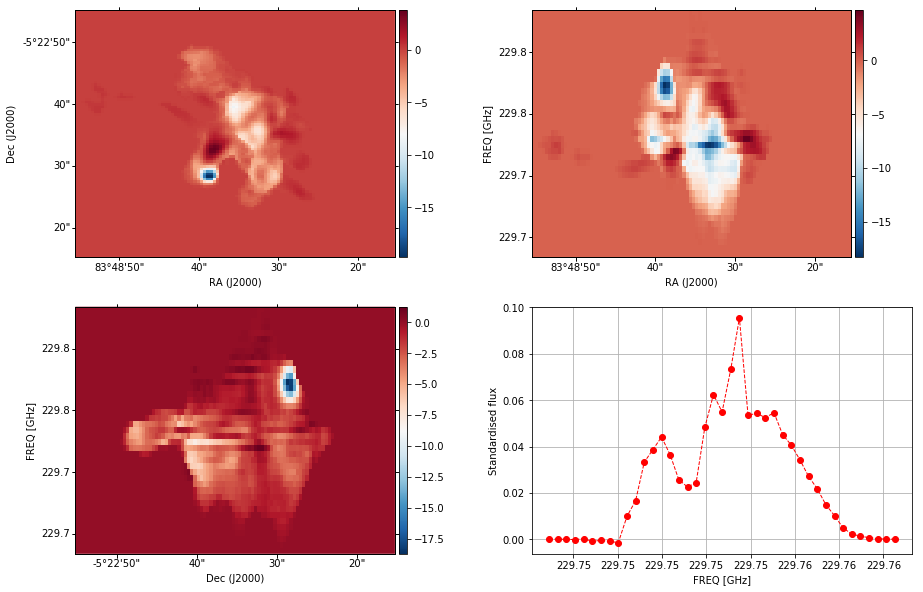

----------------------------------------------------------------------------------------------------------------------
RESIDUAL STATS
RMS of residual: 0.06115134397781471
Inf norm of residual: 3.888084385731501
Variance of residual: 0.0037076045762967536
Normalized flux addition: 0.4993525918114066
Normalized flux lost: 0.08716464213769283


In [7]:
hdmc.get_residual_stats(plot=True);

***

----------------------------------------------------------------------------------------------------------------------
ORIGINAL DATA


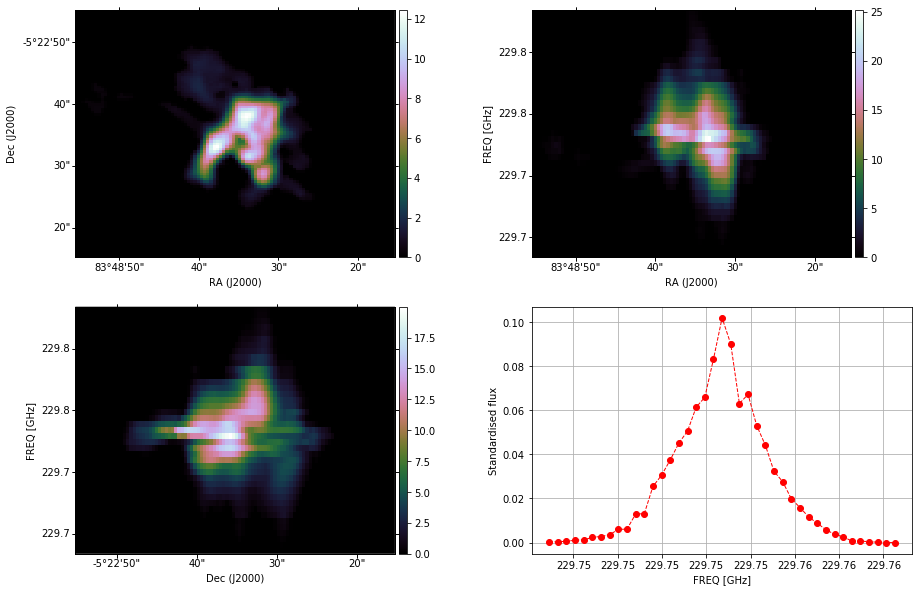

----------------------------------------------------------------------------------------------------------------------
GAUSSIAN MIXTURE


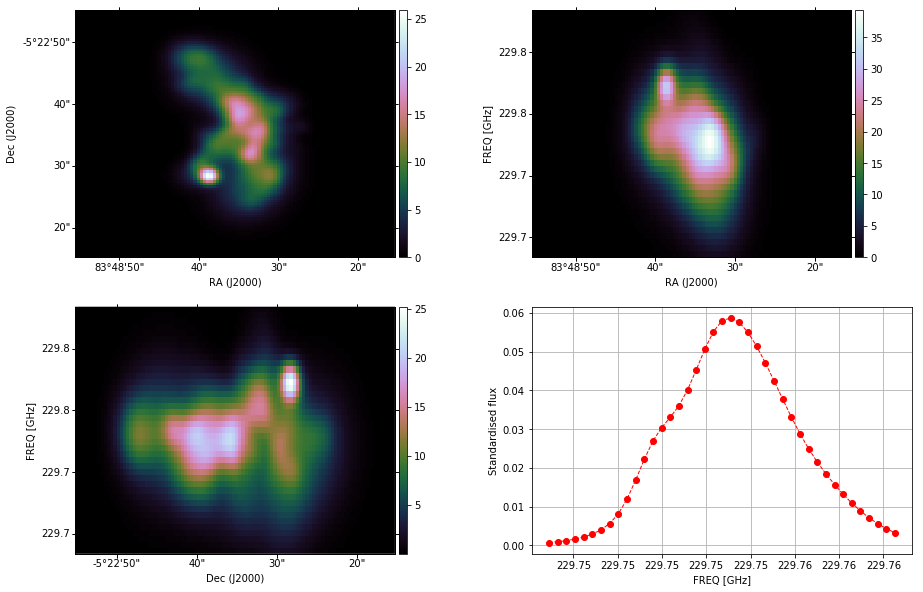

----------------------------------------------------------------------------------------------------------------------
RESIDUAL


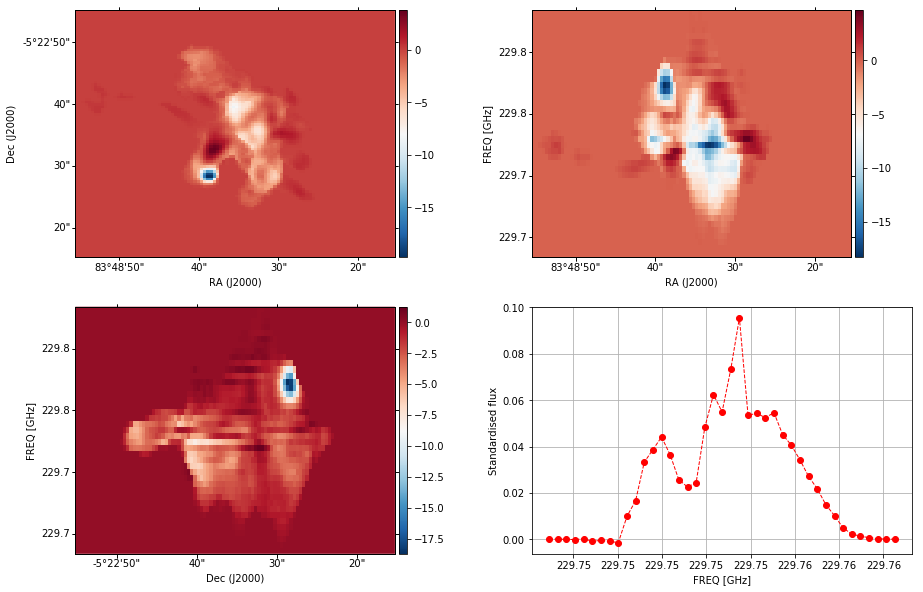

----------------------------------------------------------------------------------------------------------------------
RESIDUAL STATS
RMS of residual: 0.06115134397781471
Inf norm of residual: 3.888084385731501
Variance of residual: 0.0037076045762967536
Normalized flux addition: 0.4993525918114066
Normalized flux lost: 0.08716464213769283


In [8]:
hdmc.get_residual_stats(plot=True);

In [9]:
hdmc.solver_output()

AttributeError: 'HDMClouds' object has no attribute 'solver_output'

In [10]:
print("Elapsed time {0}".format(hdmc.elapsed_time))

Elapsed time 753.7940349578857


In [11]:
w,sig = hdmc.get_params_mapped()

print("PARAMETERS VARIATION:")
print("w variation: ",np.max(np.abs(hdmc.w0-w)))
print("sig variation: ",np.max(np.abs(hdmc.sig0-sig)))

AttributeError: 'HDMClouds' object has no attribute 'get_params_mapped'

In [12]:
print(open('gma_prof', 'r').read())

         11958351 function calls (11956139 primitive calls) in 753.794 seconds

   Ordered by: internal time
   List reduced from 203 to 30 due to restriction <30>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   173227  587.484    0.003  587.484    0.003 {fgm_eval.gm_eval3d_2}
        3  112.182   37.394  753.711  251.237 {built-in method scipy.optimize._minpack._lmdif}
   519672   15.661    0.000   29.474    0.000 necompiler.py:749(evaluate)
   173224   12.528    0.000   20.109    0.000 hdmclouds_v1.py:43(d1psi1)
   173230    6.069    0.000    6.069    0.000 utils.py:149(sig_mapping)
   173224    5.426    0.000  641.541    0.004 hdmclouds_v1.py:887(F)
   519675    3.738    0.000    4.664    0.000 necompiler.py:535(getContext)
   519672    3.357    0.000    5.294    0.000 necompiler.py:724(getArguments)
   519675    1.339    0.000    1.339    0.000 {built-in method builtins.sorted}
  1039344    1.226    0.000    1.226    0.000 necompiler.py:685(getType)
  10

***

In [13]:
hdmc.build_hierarchical_tree()

Building the hierarchical tree for Isolated Cloud Entity A


ValueError: all the input array dimensions except for the concatenation axis must match exactly

***

## Again with bigger number of centers: `750`

In [11]:
%%prun -s tottime -q -l 30 -T gmr_v0_prof
rms = estimate_rms(data)
hdmc = HDMClouds(data, bak_level=rms, wcs=wcs, verbose=False, n_center=750)

[INFO] Number of usable pixels: 17411
 
*** Profile printout saved to text file 'gmr_v0_prof'. 


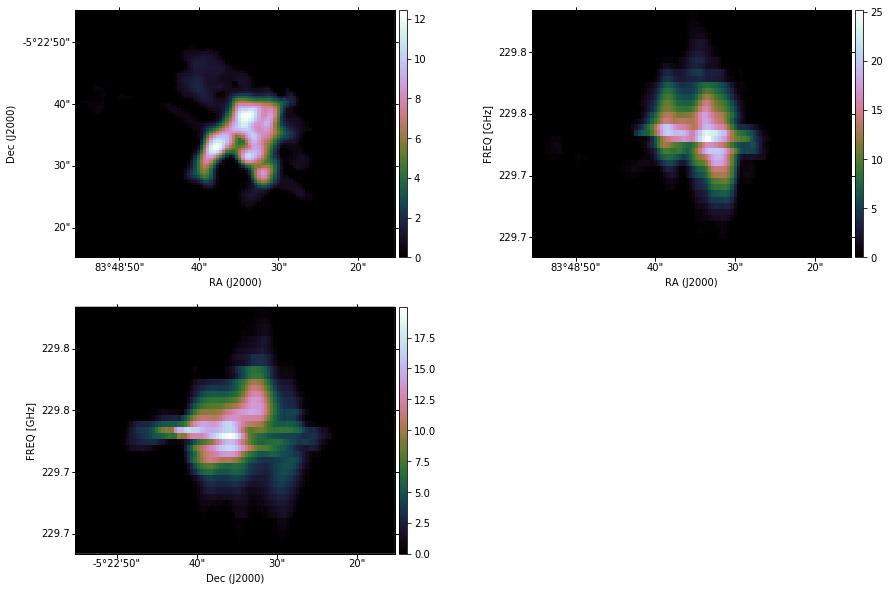

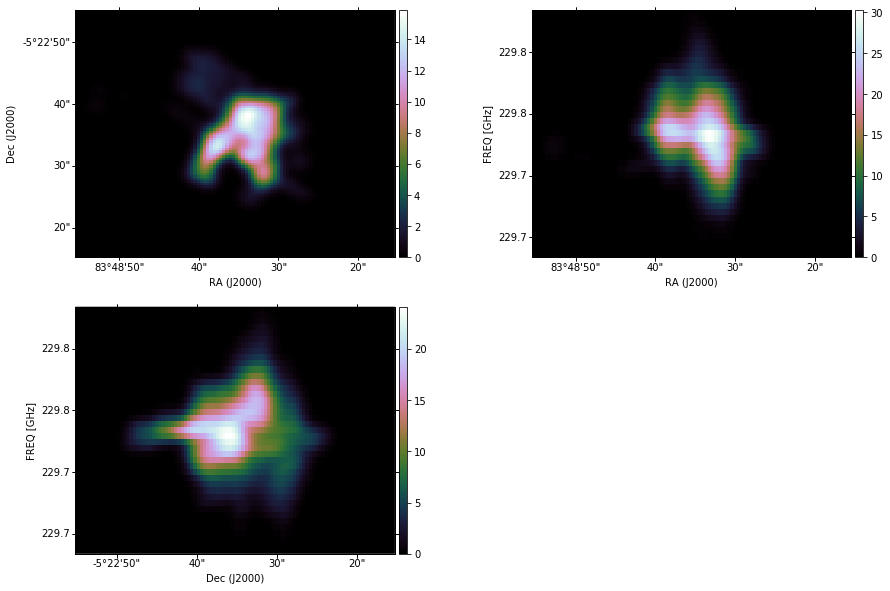

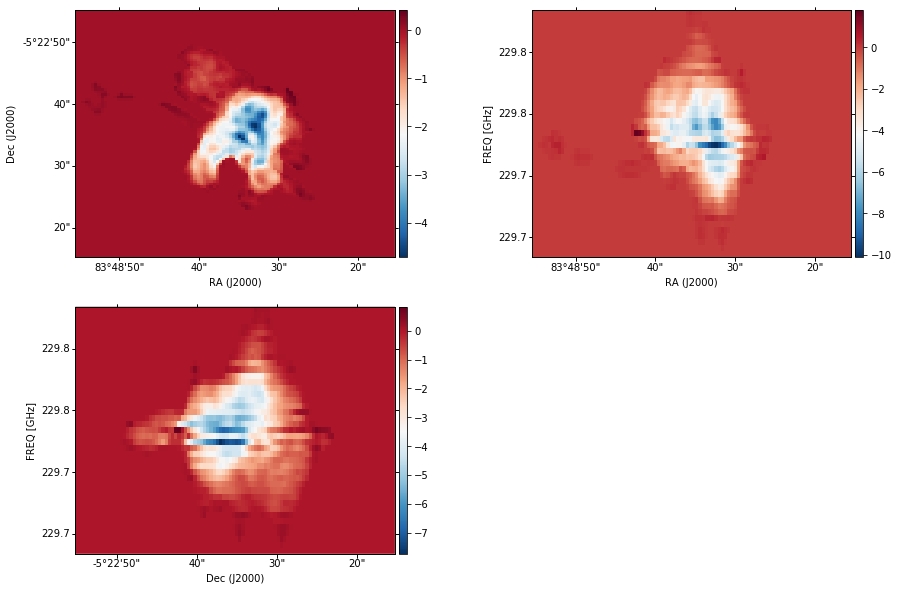

RESIDUAL STATS
RMS of residual: 0.027567495941751997
Inf norm of residual: 0.47003436221792994
Variance of residual: 0.0007416502978021524
Normalized flux addition: 0.3279445943058544
Normalized flux lost: 0.015522192790487518


In [12]:
hdmc.get_residual_stats();

***

In [13]:
hdmc.build_gmr()

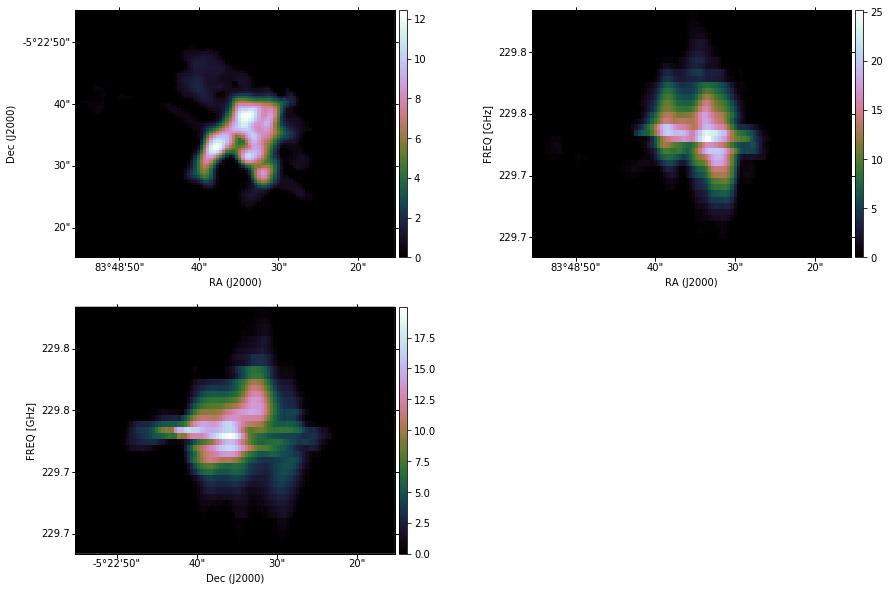

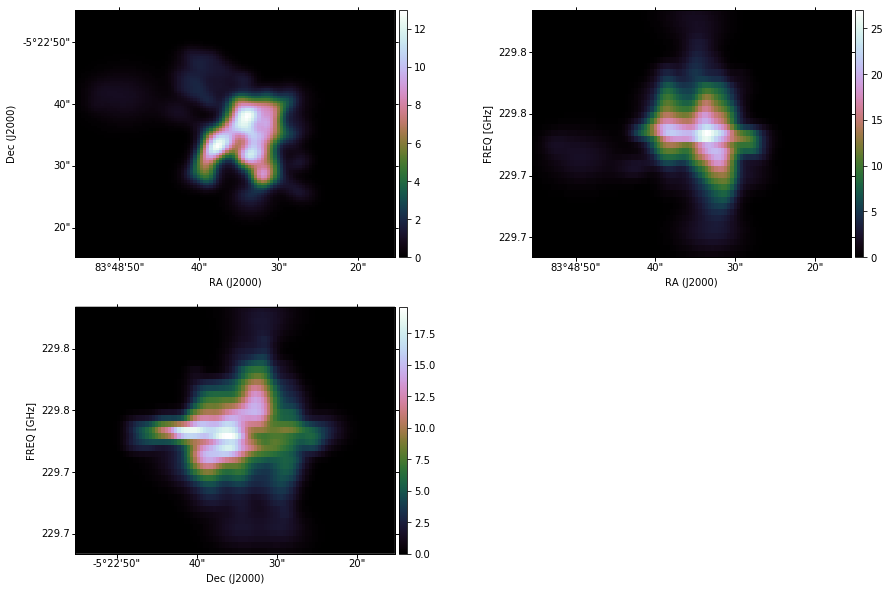

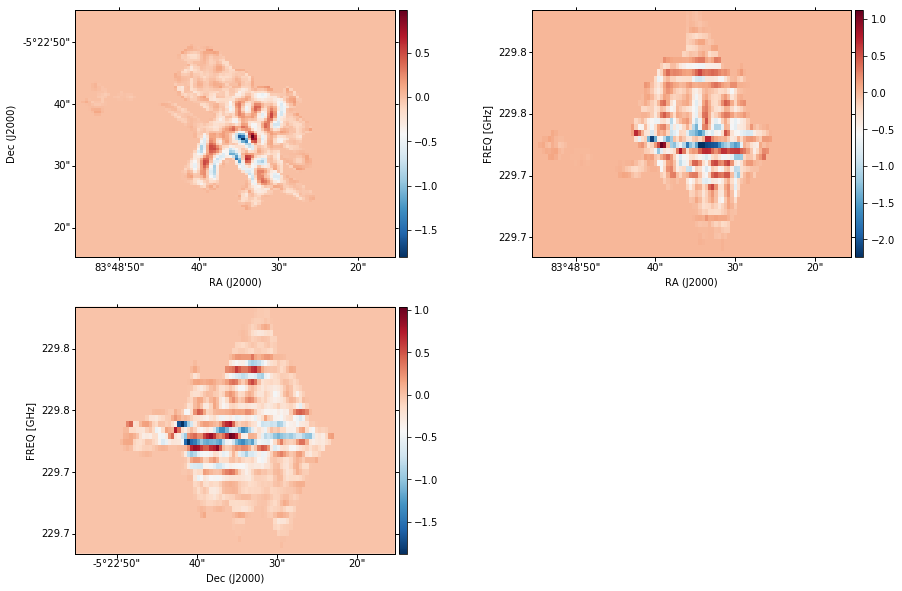

RESIDUAL STATS
RMS of residual: 0.008636562198282679
Inf norm of residual: 0.2564620791689578
Variance of residual: 7.445141911669721e-05
Normalized flux addition: 0.06149108124026307
Normalized flux lost: 0.034295667667530394


In [14]:
hdmc.get_residual_stats(plot=True);

In [15]:
hdmc.solver_output()

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 300200.
nfev: 300232
xtol: 1e-07
ftol: 1e-07


In [16]:
print("Elapsed time {0}".format(hdmc.elapsed_time))

Elapsed time 4004.462811231613


In [17]:
w,sig = hdmc.get_params_mapped()

print("PARAMETERS VARIATION:")
print("w variation: ",np.max(np.abs(hdmc.w0-w)))
print("sig variation: ",np.max(np.abs(hdmc.sig0-sig)))

PARAMETERS VARIATION:
w variation:  0.2962359355920815
sig variation:  0.06905267360801996


***